In [17]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [6]:
df = pd.read_csv("data\df_01.csv", index_col=[0])

In [7]:
y = df[['FORCE_2020_LITHOFACIES_LITHOLOGY']]
X = df.drop(columns=['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE'])

In [8]:
lithology_keys = {30000: 0,
                  65030: 1,
                  65000: 2,
                  80000: 3,
                  74000: 4,
                  70000: 5,
                  70032: 6,
                  88000: 7,
                  86000: 8,
                  99000: 9,
                  90000: 10,
                  93000: 11}

In [9]:
y['FORCE_2020_LITHOFACIES_LITHOLOGY'] = y['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_keys)
y = y['FORCE_2020_LITHOFACIES_LITHOLOGY']

C:\Users\tatya\AppData\Local\Temp\ipykernel_11060\2302718488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['FORCE_2020_LITHOFACIES_LITHOLOGY'] = y['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_keys)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
# model = xgb.XGBClassifier(learning_rate=0.01)
# parametrs = {'max_depth': range(1, 31), 'n_estimators': range(10, 101, 10)}
# grid_search_cv_clf = GridSearchCV(model, parametrs, cv=5)

In [38]:
#grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': range(1, 31),
                         'n_estimators': range(10, 101, 10)})

In [39]:
#grid_search_cv_clf.best_params_

{'max_depth': 25, 'n_estimators': 100}

In [11]:
best_model = xgb.XGBClassifier(learning_rate=0.01, max_depth=25, n_estimators=100)
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [14]:
prediction = best_model.predict(X_test)

In [16]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3697
           1       0.90      0.86      0.88      2660
           2       0.97      0.98      0.97     17295
           3       0.93      0.91      0.92      1303
           4       0.90      0.55      0.68        78
           5       0.93      0.85      0.89      2204
           6       0.98      0.99      0.98       677
           7       0.99      1.00      1.00      1690
           8       0.93      0.86      0.89       144
           9       0.94      0.97      0.95       554
          10       0.86      0.70      0.78        54

    accuracy                           0.95     30356
   macro avg       0.93      0.87      0.90     30356
weighted avg       0.95      0.95      0.95     30356



<Axes: >

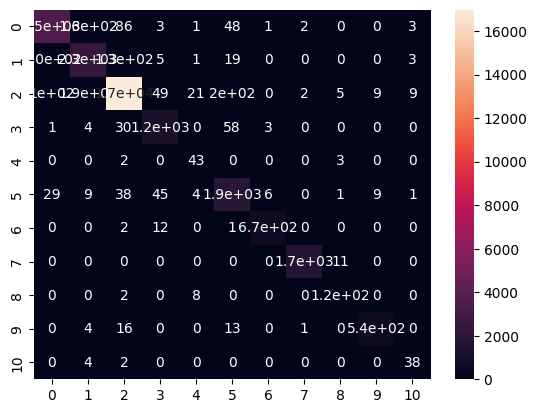

In [18]:
cm = confusion_matrix(prediction, y_test)
sns.heatmap(cm, annot=True)